Q: Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

df = pd.read_csv("College.csv")

df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})

np.random.seed(1)

train_index = np.random.choice(np.arange(len(df)), size=int( len(df) * 0.7), replace=False)

train = df.iloc[train_index]
train = train.drop(columns= ["Unnamed: 0"])

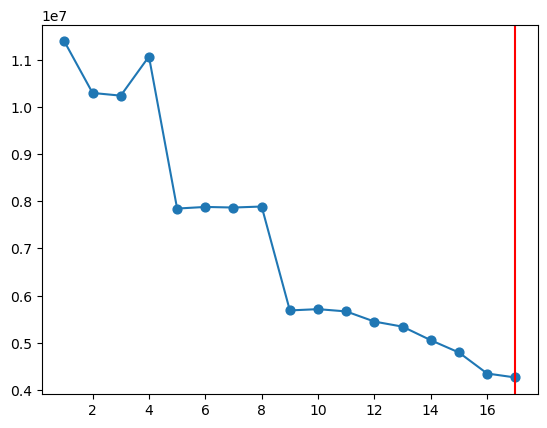

In [111]:
np.random.seed(11)

cv = KFold(n_splits=10, shuffle=True, random_state=11)
mse_scores = []

for nvmax in range(1, 18):

    X = train.drop(columns= ["Outstate","Unnamed: 0"])
    y = train["Outstate"]

    model = LinearRegression()
    mse = -cross_val_score(model, X.iloc[:, :nvmax], y, cv=cv, scoring="neg_mean_squared_error").mean()

    mse_scores.append(mse)

mse_std_error = np.std(mse_scores) / np.sqrt(10)

min_mse_index = np.argmin(mse_scores)

results_df = pd.DataFrame({"nvmax": range(1, 18), "MSE": mse_scores})

results_df["MSE_SE_low"] = results_df["MSE"] - mse_std_error
results_df["MSE_SE_high"] = results_df["MSE"] + mse_std_error
results_df["min_CV_MSE"] = results_df["MSE"].idxmin() == results_df.index

plt.plot(results_df["nvmax"], results_df["MSE"])
plt.axvline(x=min_mse_index + 1, color="red")
plt.scatter(results_df["nvmax"], results_df["MSE"], s=40)
plt.show()

Q: Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

In [114]:
selected_nvmax = 6

# Extraer las columnas seleccionadas correspondientes a nvmax = 6
selected_columns = train.columns[:selected_nvmax]

# Ajustar un modelo de regresión lineal con las columnas seleccionadas
model = LinearRegression()
model.fit(train[selected_columns], train['Outstate'])

# Obtener los coeficientes
coeficientes = model.coef_

# Imprimir los coeficientes
print(coeficientes)

[ 3.96464364e+03 -1.79853662e-01  1.06423515e+00 -1.87596541e+00
  1.20922893e+02 -4.94694855e+00]
